# **Dataset arrangements**

**Merging datasets**

In [ ]:
import os
import shutil

In [ ]:
import zipfile

path_to_zip_file = "/content/drive/MyDrive/Final_Content.zip"
directory_to_extract_to = "/content/drive/MyDrive"

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
source_folders = [
    "/content/drive/MyDrive/Dataset/PK_Lot_1/Cloudy",
    "/content/drive/MyDrive/Dataset/PK_Lot_1/Sunny",
    "/content/drive/MyDrive/Dataset/PK_Lot_1/Rainy",
    "/content/drive/MyDrive/Dataset/PK_Lot_2/Cloudy",
    "/content/drive/MyDrive/Dataset/PK_Lot_2/Rainy",
    "/content/drive/MyDrive/Dataset/PK_Lot_2/Sunny",
    "/content/drive/MyDrive/Dataset/PK_Lot_3/Cloudy",
    "/content/drive/MyDrive/Dataset/PK_Lot_3/Sunny",
    "/content/drive/MyDrive/Dataset/PK_Lot_3/Rainy"
]

destination_folder = "/content/drive/MyDrive/Final_Content"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through source folders and merge contents
for source_folder in source_folders:
    for root, _, files in os.walk(source_folder):
        for file in files:
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(destination_folder, file)
            shutil.copy(source_file_path, destination_file_path)

print("Contents merged successfully.")

Contents merged successfully.


**Adding labels**

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
input_folder = "/content/drive/MyDrive/Final_Content"
output_folder = "/content/drive/MyDrive/Temp"

image_width = 1280
image_height = 720

class_mapping = {"1": 1, "0": 0}

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

xml_files = [f for f in os.listdir(input_folder) if f.endswith(".xml")]
for xml_file in xml_files:
    xml_path = os.path.join(input_folder, xml_file)

    tree = ET.parse(xml_path)
    root = tree.getroot()

    txt_filename = os.path.splitext(xml_file)[0] + ".txt"
    txt_path = os.path.join(output_folder, txt_filename)

    with open(txt_path, "w") as txt_file:
        for space in root.findall("space"):
            occupied = space.get("occupied")
            class_index = class_mapping.get(occupied, -1)

            if class_index == -1:
                continue

            rotated_rect = space.find("rotatedRect")
            center = rotated_rect.find("center")
            size = rotated_rect.find("size")

            center_x = float(center.get("x"))
            center_y = float(center.get("y"))
            width = float(size.get("w"))
            height = float(size.get("h"))

            x_center = center_x / image_width
            y_center = center_y / image_height
            w = width / image_width
            h = height / image_height

            txt_file.write(f"{class_index} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

    new_xml_path = os.path.join(output_folder, xml_file)
    os.rename(xml_path, new_xml_path)

print("Annotations generated and XML files moved.")

Annotations generated and XML files moved.


In [ ]:
# Move the txt files from the xml folder to the total-content folder

source_folder = "/content/drive/MyDrive/Temp"
destination_folder = "/content/drive/MyDrive/Final_Content"

txt_files = [f for f in os.listdir(source_folder) if f.endswith(".txt")]

for txt_file in txt_files:
    source_path = os.path.join(source_folder, txt_file)
    destination_path = os.path.join(destination_folder, txt_file)
    shutil.move(source_path, destination_path)

print("TXT files moved to data/total-content folder.")

TXT files moved to data/total-content folder.


# **Data splitting**

In [ ]:
import random

In [ ]:
source_folder = "/content/drive/MyDrive/Final_Content"
train_folder = "/content/drive/MyDrive/Train"
test_folder = "/content/drive/MyDrive/Test"
val_folder = "/content/drive/MyDrive/Valid"

train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

for folder in [train_folder, test_folder, val_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

all_files = os.listdir(source_folder)
image_files = [f for f in all_files if f.endswith(".jpg")]
image_files[:10]

['2012-11-11_15_44_11.jpg',
 '2012-11-11_14_59_09.jpg',
 '2012-11-11_16_24_13.jpg',
 '2012-11-11_15_09_10.jpg',
 '2012-11-11_16_09_12.jpg',
 '2012-11-11_16_54_14.jpg',
 '2012-11-11_14_14_07.jpg',
 '2012-11-11_15_14_10.jpg',
 '2012-11-11_16_14_13.jpg',
 '2012-11-11_15_24_10.jpg']

In [ ]:
# Calculate the number of samples for each split
num_samples = len(image_files)
num_train = int(train_ratio * num_samples)
num_test = int(test_ratio * num_samples)
num_val = num_samples - num_train - num_test

random.shuffle(image_files)

train_files = image_files[:num_train]
test_files = image_files[num_train:num_train + num_test]
val_files = image_files[num_train + num_test:]

len(train_files), len(test_files), len(val_files)

(7449, 2483, 2483)

In [ ]:
file_path = "/content/drive/MyDrive/Final_Content/2012-10-14_08_29_42.jpg"
try:
    os.remove(file_path)
    print(f"File '{file_path}' has been removed successfully.")
except OSError as e:
    print(f"Error removing the file '{file_path}': {e}")

In [ ]:
# Move corresponding txt files along with images
for folder, files in [(train_folder, train_files), (test_folder, test_files), (val_folder, val_files)]:
    for file in files:
        # Move image file
        source_image_path = os.path.join(source_folder, file)
        destination_image_path = os.path.join(folder, file)
        shutil.move(source_image_path, destination_image_path)

        # Move corresponding txt file
        txt_file = os.path.splitext(file)[0] + ".txt"
        source_txt_path = os.path.join(source_folder, txt_file)
        destination_txt_path = os.path.join(folder, txt_file)
        shutil.move(source_txt_path, destination_txt_path)

print("Data split into train, test, and val sets.")

# **Model Development**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

In [ ]:
model.train(data="/content/drive/MyDrive/Final_Content_Old/Final_Content/data.yaml", epochs=3)

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Final_Content_Old/Final_Content/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a6e27783880>
fitness: 0.9016708089071649
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.90451,     0.87906])
names: {0: 'empty', 1: 'occupied'}
plot: True
results_dict: {'metrics/precision(B)': 0.9644397499671138, 'metrics/recall(B)': 0.9946778901193878, 'metrics/mAP50(B)': 0.9906478431780998, 'metrics/mAP50-95(B)': 0.8917844717659499, 'fitness': 0.9016708089071649}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.3502962175109577, 'inference': 2.7174918304586635, 'loss': 0.0013138766579784697, 'postprocess': 1.9324700037638347}

# **Testing Model**

In [ ]:
import os
from PIL import Image

In [ ]:
# Test Image Directory
test_images_directory = "/content/drive/MyDrive/Final_Content_Old/Final_Content/Test/images"

# Create a list of all image file paths in test directory
image_files = [f for f in os.listdir(test_images_directory) if f.lower().endswith(".jpg")]


image 1/1 /content/drive/MyDrive/Final_Content_Old/Final_Content/Test/images/2012-11-09_13_51_52.jpg: 384x640 40 emptys, 60 occupieds, 93.9ms
Speed: 1.9ms preprocess, 93.9ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)


100


In [ ]:
# Choose a random image file for testing
random_image_filename = random.choice(image_files)
random_image_path = os.path.join(test_images_directory, random_image_filename)

results = model.predict(random_image_path)
result = results[0]

# Print the results of parking slot data
print(len(result.boxes))


image 1/1 /content/drive/MyDrive/Final_Content_Old/Final_Content/Test/images/2013-01-18_14_10_10.jpg: 384x640 23 emptys, 5 occupieds, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


28


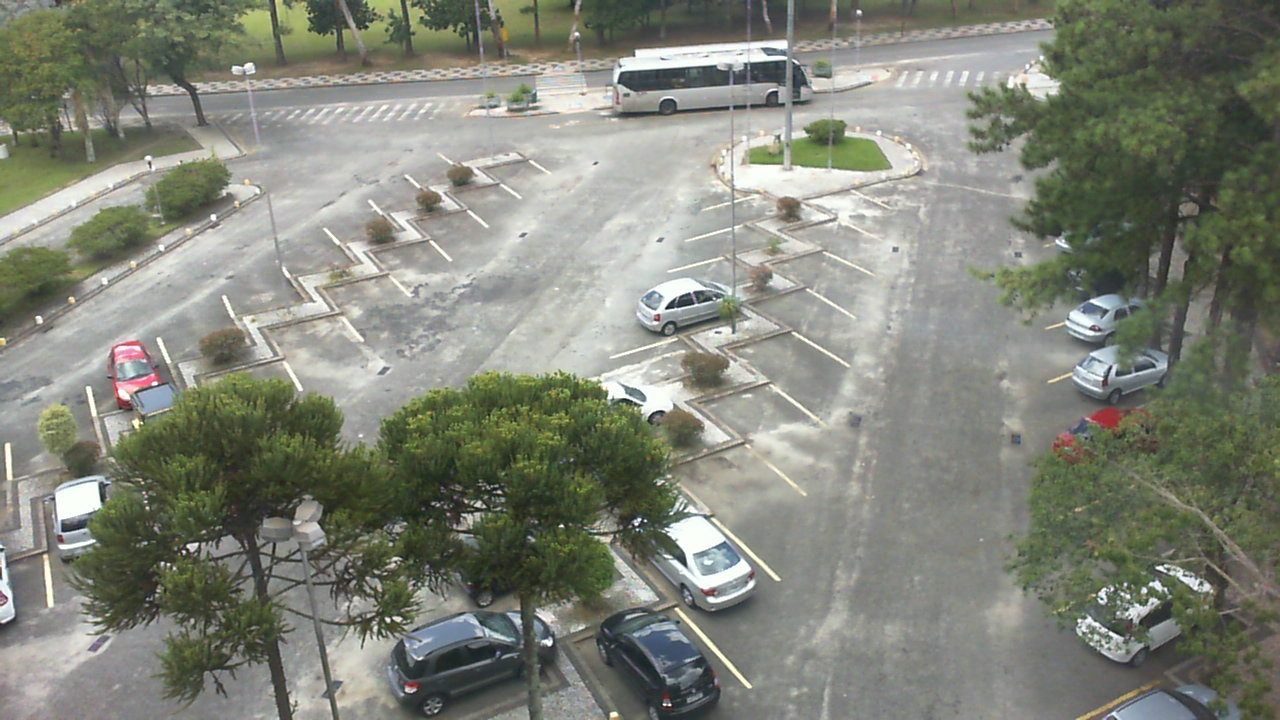

In [ ]:
# Original Image
Image.open(random_image_path)

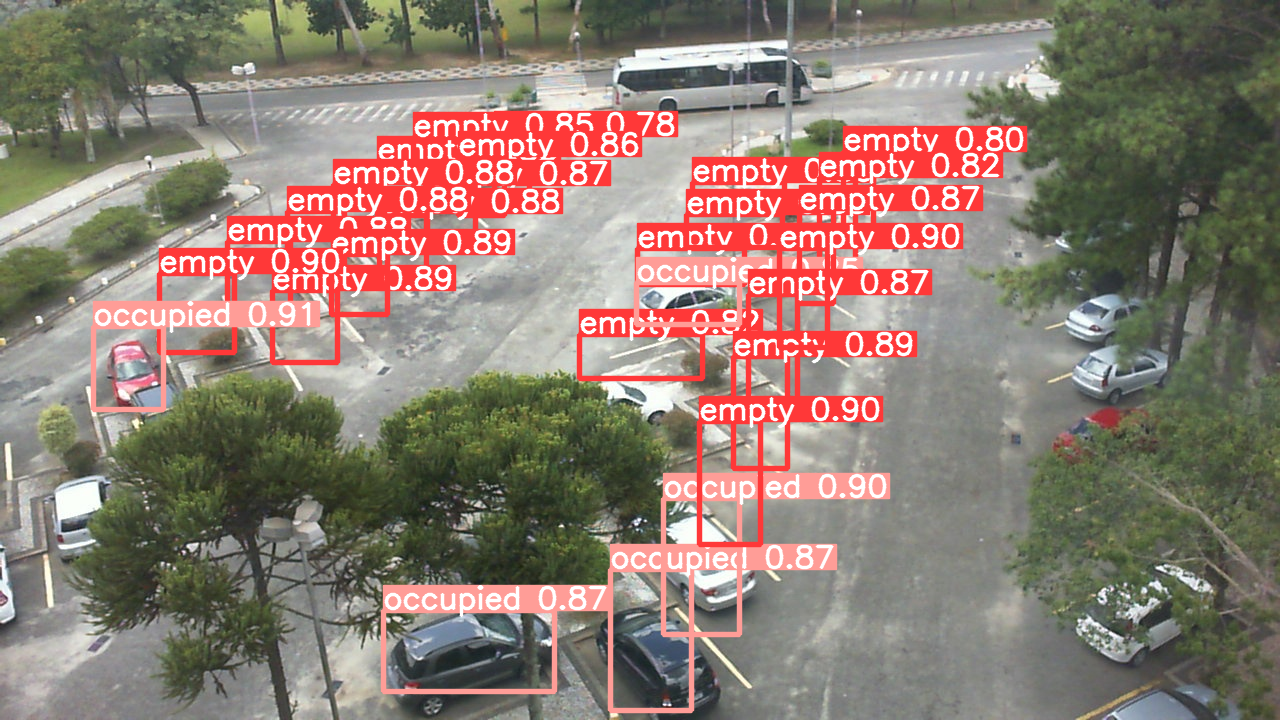

In [ ]:
# Image with results of the model
Image.fromarray(result.plot()[:,:,::-1])